# Sistemas Inteligentes

## Exercício Computacional 4 - Agrupamento (Clusterização)

### Identificação do Aluno

#### Nome Completo

ESCREVA AQUI A SUA RESPOSTA

#### RA

ESCREVA AQUI A SUA RESPOSTA

## Instruções

1. Escolha um dataset, identifique-o e mostre suas características, então indique quais são os seus objetivos com esse dataset (no campo correspondente).

2. Com o dataset já importado para o notebook, faça os pré-processamentos que julgar necessários e, se for conveniente, efetue uma redução de dimensionalidade utilizando um método compatível com seus dados.

3. Utilize ao menos um método de Cross-Validation de sua preferência.

4. Escolha dois métodos de agrupamento (clusterização) para realizar abordagens distintas, então aplique-os ao dataset para chegar ao objetivo indicado por você no próprio notebook.

5. Utilize células intermediárias de tipo _Markdown_ para explicar o que é feito em cada célula de código. Mas não deixe de utilizar comentários breves e pertinentes dentro do próprio código. Isto significa que o desenvolvimento NÃO deve ser feito em uma única célula.

6. Sempre que for cabível, exiba as figuras, os gráficos, os valores (ao menos parte deles) etc., mas procure sempre manter um capricho em todas as saídas.

7. Ao final, comente da forma mais completa possível os resultados obtidos, sempre sugerindo o que poderia ser feito para melhorá-los e fornecendo elementos que contribuam para a sua compreensão.

8. Respeitem as regras gramaticais e procurem manter coesão, coerência e fluidez em seus textos.

9. Apesar de a análise dos resultados ser mais importante do que o código em si, serão analisados critérios como organização e clareza do código, então evitem códigos "poluídos" e confusos.

### Dataset

#### Nome do Dataset

Wine recognition

#### Características do Dataset

Este dataset é muito conhecido e utilizado pela comunidade junto com o sklearn por ser uma dataset simples e conhecido como "Toy Dataset" e divid

Os dados são uma análise química das uvas crescidas em uma região da Itália. São treze medidas diferentes presentes em três tipos de vinhos.
The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

Verificar:

O dataset escolhido foi o wine recognition que é um dataset simples dentro do sklearn e não precisa de nenhum download externo, também conhecido como toy dataset.   

O dataset é composto da análise química de vinhos produzidos na mesma região na Itália por três agricultres diferentes. Foram analisados treze compostos diferentes encontrados nos três tipos de vinho.

O dataset possui 178 elementos divididos em 3 classes, sendo 59 elementos da primeira, 71 da segunda e 48 da terceira. Cada elemento possui 13 atributos numericos e a classe. 

#### Fonte do Dataset

O dataset se encontra dentro do pacote sklearn.datasets e não necessita de nenhum download adicional

### Objetivos

O objetivo desse dataset é identificar qual a classe de um elementos através de seus atributos, ou seja, qual a região em que um vinho foi produzido através da analise de compostos químicos encontrados nele. É esperado que os métodos de clusterização sejam capazes de 

## Desenvolvimento

Import de todos as bibliotecas e métodos necessários

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FastICA
from sklearn.cluster import AffinityPropagation, KMeans
from sklearn.metrics import v_measure_score, homogeneity_score, completeness_score
import numpy as np
import matplotlib.pyplot as plt

Definimos as variáveis de dados e target e verificamos suas dimensões.

In [2]:
X, y = load_wine(return_X_y=True)
np.shape(X)

(178, 13)

Usamos o FastICA para reduzir para duas dimensões.

In [3]:
fastICA = FastICA(n_components=2)
fastICA.fit(X)
X_ICA = fastICA.transform(X)
np.shape(X_ICA)

(178, 2)

Dividimos os dados entre treino e teste (15%).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_ICA, y, test_size=0.15, random_state=42)

Preparamos os centroides dos clustering.

In [5]:
centroide0 = []
centroide1 = []
centroide2 = []

for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        centroide0.append(X_train[i])
    if y_train[i] == 1:
        centroide1.append(X_train[i])
    else:
        centroide2.append(X_train[i])
        
centroide0 = np.array(centroide0)
centroide1 = np.array(centroide1)
centroide2 = np.array(centroide2)

centroide0_cm = np.array([np.mean(centroide0[:,0]), np.mean(centroide0[:,1])])
centroide1_cm = np.array([np.mean(centroide1[:,0]), np.mean(centroide1[:,1])])
centroide2_cm = np.array([np.mean(centroide2[:,0]), np.mean(centroide2[:,1])])

cm = np.vstack((centroide0_cm, centroide1_cm, centroide2_cm))

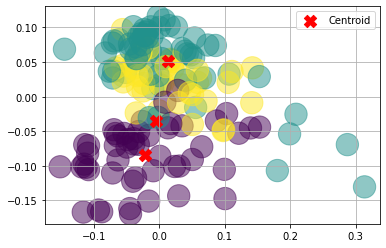

In [6]:
plt.figure()
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap="viridis", s=500, alpha=0.5)
plt.grid(True)

plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

Criamos e treinamentos os dois clusterizadores, Affinity Propagation e KMeans.

In [7]:
affinityP = AffinityPropagation(random_state=50).fit(X_train)
ap_pred = affinityP.predict(X_test)

In [8]:
kmeans = KMeans(n_clusters=3).fit(X_train)
kmeans_pred = kmeans.predict(X_test)

Resultado do Affnity Propagation:

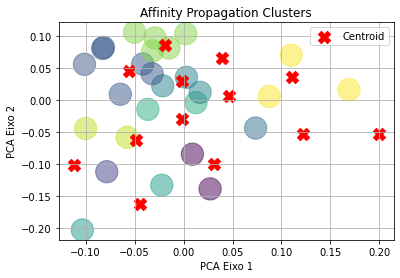

In [9]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=ap_pred, cmap='viridis', s=500, alpha=0.5)

plt.xlabel('PCA Eixo 1')
plt.ylabel('PCA Eixo 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=affinityP.cluster_centers_[:,0], y=affinityP.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

Resultado do k-Means:

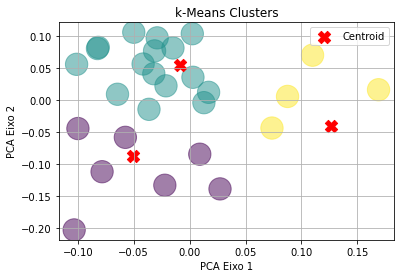

In [10]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=kmeans_pred, cmap='viridis', s=500, alpha=0.5)
plt.xlabel('PCA Eixo 1')
plt.ylabel('PCA Eixo 2')
plt.title('k-Means Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

Usamos o V-Measure Score como algoritmo de cross-validation, por ser muito eficaz em clusteres.

In [11]:
vsc_ap = v_measure_score(y_test, ap_pred)
print(f"V-Score do Affinity Propagation: {vsc_ap}")

vsc_kmeans = v_measure_score(y_test, kmeans_pred)
print(f"V-Score do KMeans: {vsc_kmeans}")

V-Score do Affinity Propagation: 0.40537218195792685
V-Score do KMeans: 0.43044579747117334


In [12]:
hom_ap = homogeneity_score(y_test, ap_pred)
print(f"Homogeneidade do Affinity Propagation: {hom_ap}")

comp_ap = completeness_score(y_test, ap_pred)
print(f"Completude do Affinity Propagation: {comp_ap}")


hom_kmeans = homogeneity_score(y_test, ap_pred)
print(f"Homogeneidade do KMeans: {hom_kmeans}")
comp_kmeans = completeness_score(y_test, ap_pred)
print(f"Completude do Kmeans: {comp_kmeans}")

Homogeneidade do Affinity Propagation: 0.6054516198508019
Completude do Affinity Propagation: 0.3046850172311775
Homogeneidade do KMeans: 0.6054516198508019
Completude do Kmeans: 0.3046850172311775


## Discussão sobre os resultados

Os resultados obtidos com o uso do AffinityPropagation e do KMeans ficaram abaixo do esperado. 
O V-Score compara a classificação obtida pelo algoritmo com classificação esperada, retornando uma nota de 0 a 1, sendo que 1 indica que os elementos foram perfeitamente classificados. Podemos ver que as notas foram baixas, aproximadamente 0.40 e 0.43 para o AffinitiPropagation e para o KMeans, respectivamente. 
Podemos analisar esses resultados com mais detalhes observando a homogeneidade e a completude dos clusters obtidos. Homogeneidade ocorre quando cada cluster contém elementos de apenas uma classe e completude ocorre quando todos os membros de uma mesma classe pertencem ao mesmo cluster. Para ambos algoritmos o grau homogeneidade foi maior do que o de completude, sendo eles, 0.6 e 0.3, respectivamente, para ambos algoritmos.
Talvez a utilização de algum outro método junto com os algoritmos analisados fosse capaz de obter melhores resultados, por exemplo o uso de um kfold junto com os algoritmos.